In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dataset=pd.read_csv('Customers.csv')

In [15]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
X=dataset.iloc[:,[3,4]].values

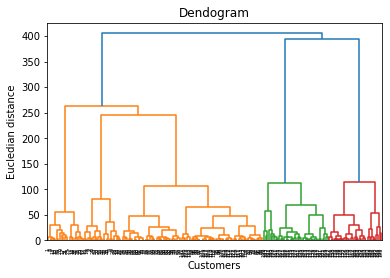

In [17]:
import scipy.cluster.hierarchy as sch 
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian distance')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [20]:
y_hc=hc.fit_predict(X)

In [21]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

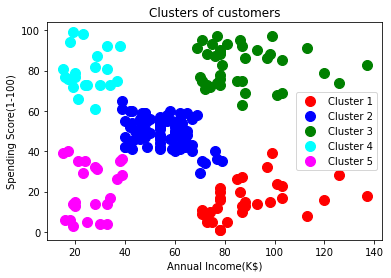

In [22]:
#Visualize the clusters
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import silhouette_samples,silhouette_score
lst_sl_avg=[]
for i in range(2,10):
    cluster_model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
    cluster_labels=cluster_model.fit_predict(X)
    sil_avg=silhouette_score(X,cluster_labels)
    lst_sl_avg.append(sil_avg)

In [25]:
lst_sl_avg

[0.5529945955148897,
 0.5529945955148897,
 0.5529945955148897,
 0.5529945955148897,
 0.5529945955148897,
 0.5529945955148897,
 0.5529945955148897,
 0.5529945955148897]